<a href="https://colab.research.google.com/github/RavindrapalRathore/Task7/blob/main/Task_7_Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
#load data 
df= pd.read_csv('/content/drive/MyDrive/dataset/task7/trainKNN.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
#Naming the list based on the data
list_of_name =['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [7]:
df=df.set_axis(list_of_name ,axis=1)
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.drop('Id',axis=1,inplace=True)
print(f'The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.')

The DataFrame contains 196 rows and 10 columns.


In [9]:
df.Type.value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: Type, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      196 non-null    float64
 1   Na      196 non-null    float64
 2   Mg      196 non-null    float64
 3   Al      196 non-null    float64
 4   Si      196 non-null    float64
 5   K       196 non-null    float64
 6   Ca      196 non-null    float64
 7   Ba      196 non-null    float64
 8   Fe      196 non-null    float64
 9   Type    196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


DATA EXPLORATION AND VISUALIZATION

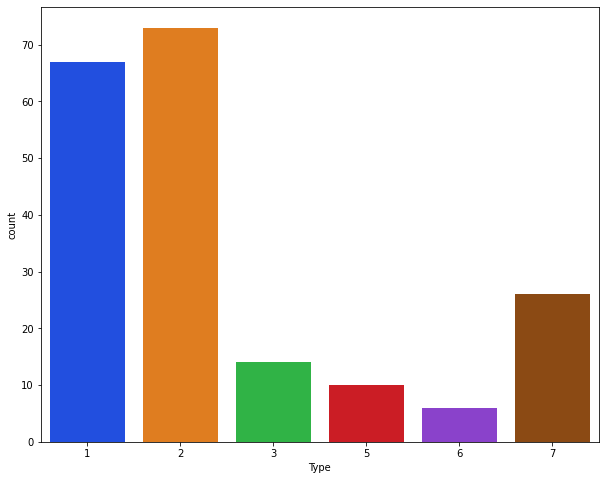

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Type', data=df, palette='bright')
plt.show()

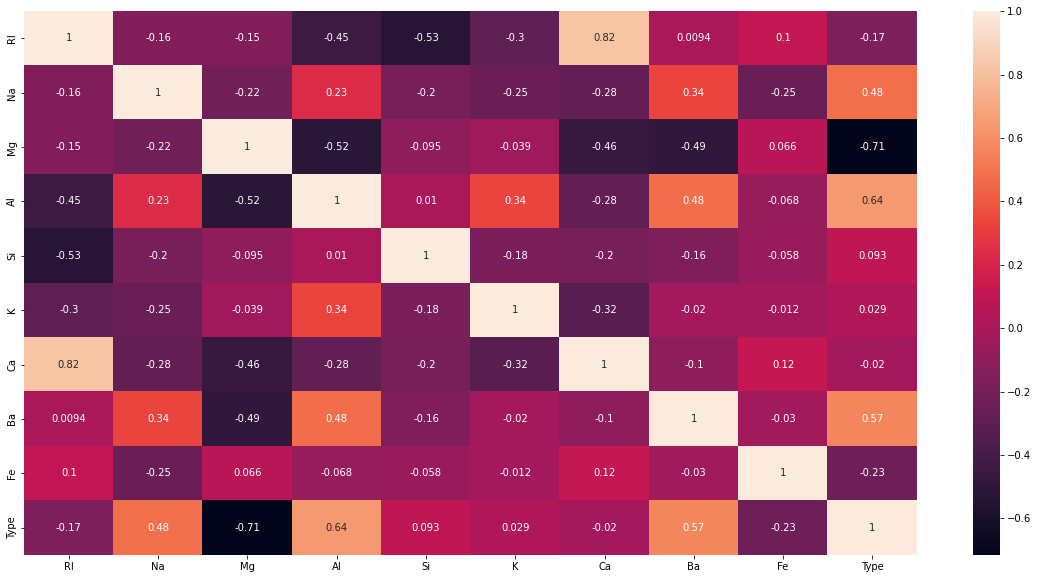

In [13]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

From the plot it is evident that Ca and K don't effect the type that much , as there values are 0.00095 and -0.01 respectively . 
Since there is high corelation btwn Ca and RI we could drop Ca and K from the data.

In [14]:
df.drop(['Ca','K'],axis=1,inplace=True)

In [15]:
df.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,1


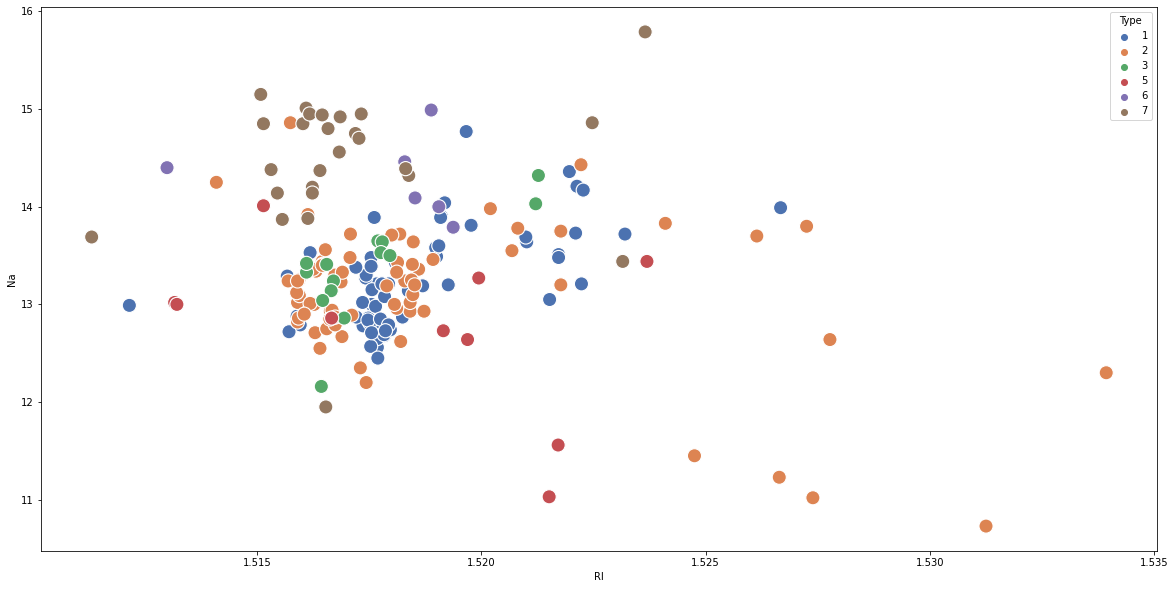

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="RI", y="Na", hue="Type",s=200, palette="deep")

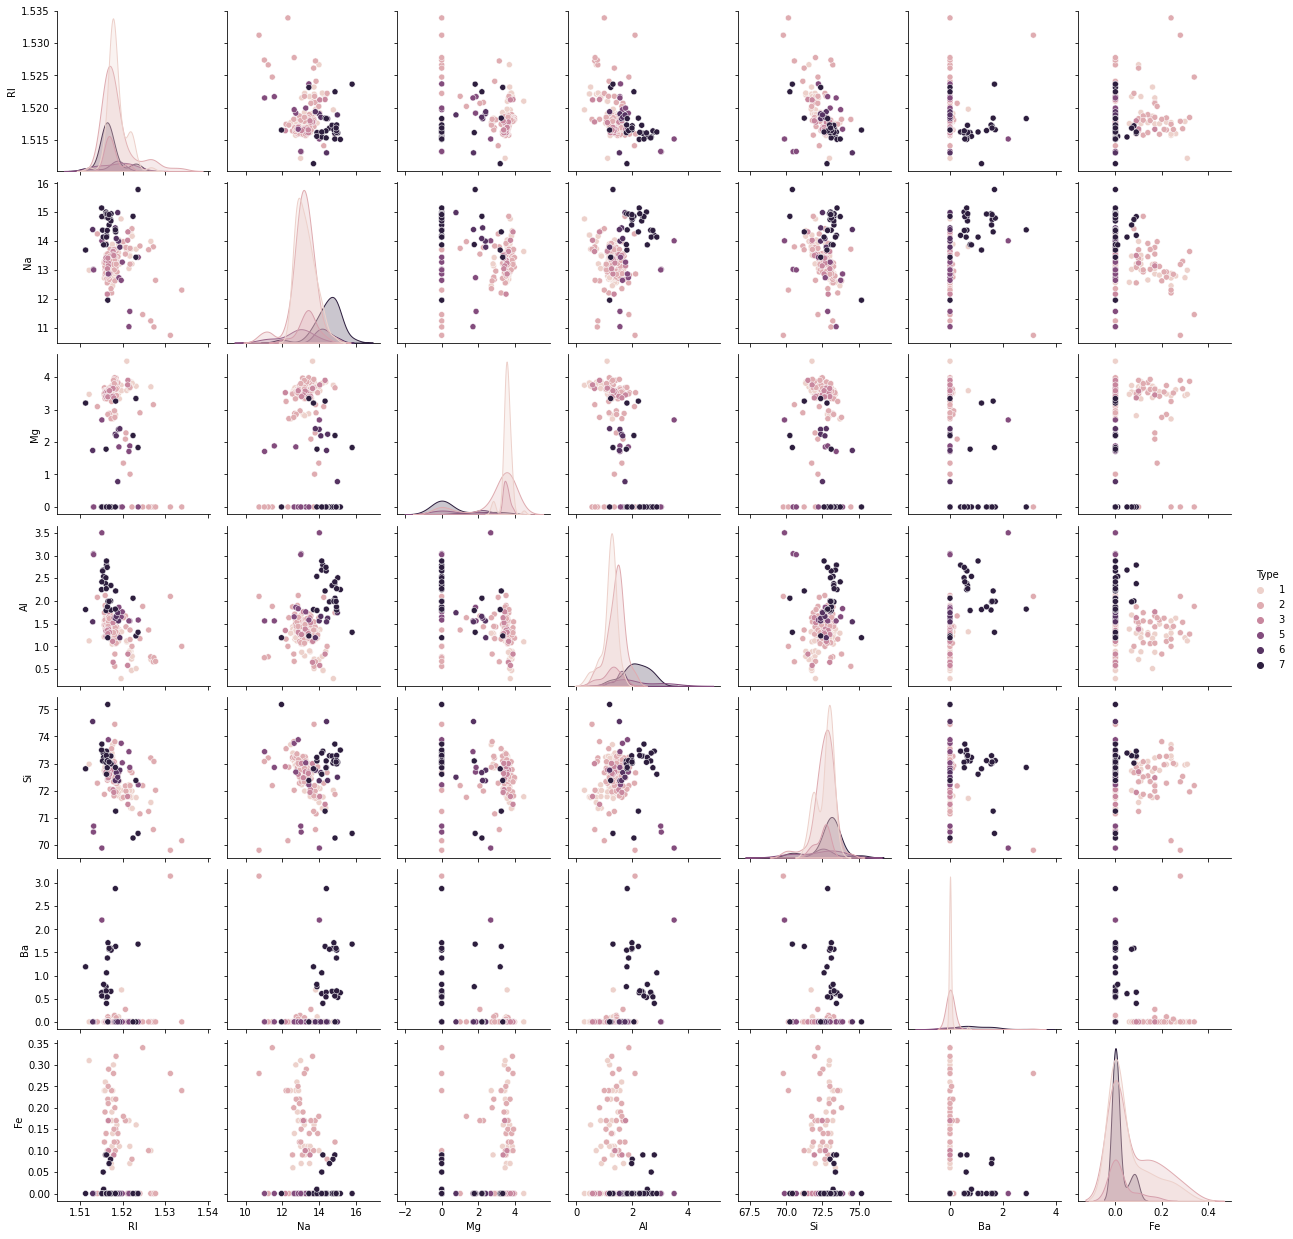

In [17]:
#let us create pairwise plot to see if the datas have any chance to be linear .
sns.pairplot(df,hue='Type')
plt.show()

The pair plot shows that the data is not linear , hense KNN can be applied .

In [18]:
x=df.iloc[:,:-1].values 
y=df.iloc[:,-1].values

In [19]:
#splitting dataset
X_train,X_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=45) 
#setting random state ensures split is same eveytime, so that the results are comparable

In [20]:
print(X_train.shape)
print(y_train.shape)

(137, 7)
(137,)


In [21]:
#Standardising the data 
sc = StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[ 4.59604550e-01,  5.90904031e-01, -2.50220338e-01,
        -5.31956117e-01,  1.29433569e-01, -3.28117827e-01,
        -5.88306321e-01],
       [-6.64979493e-01, -4.99337075e-01,  5.92026996e-01,
         1.32989029e-01,  2.22551943e-01, -3.28117827e-01,
        -5.88306321e-01],
       [ 3.31822463e+00,  6.04704551e-01,  2.82483104e-01,
        -1.53887305e+00, -2.78384128e+00, -3.28117827e-01,
        -5.88306321e-01],
       [-7.99204040e-01, -7.47746441e-01,  5.48834825e-01,
         8.16932609e-01,  2.62459818e-01, -3.28117827e-01,
        -5.88306321e-01],
       [-3.71136566e-01,  4.94300389e-01,  6.64013947e-01,
         6.45946714e-01, -8.01750172e-01, -3.28117827e-01,
        -5.88306321e-01],
       [-8.06459421e-01, -3.33730831e-01,  4.69649178e-01,
         2.08982760e-01,  7.94564813e-01, -3.28117827e-01,
         1.67033874e+00],
       [ 1.47623170e-01, -2.23326668e-01,  6.28020471e-01,
        -7.59937311e-01,  2.22551943e-01, -1.50675160e-01,
         1.4325866

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4,p=2,metric='minkowski')
model.fit(X_train, y_train)
#Power parameter for the Minkowski metric. 
#When p = 1,this is equivalent to using manhattan_distance (l1), 
# and euclidean_distance (l2)for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

KNeighborsClassifier(n_neighbors=4)

In [24]:
y_pred=model.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.75      0.68      0.71        22
           3       0.00      0.00      0.00         5
           5       0.50      1.00      0.67         1
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         9

    accuracy                           0.68        59
   macro avg       0.64      0.64      0.61        59
weighted avg       0.68      0.68      0.66        59



In [26]:
accuracy_score(y_test,y_pred)

0.6779661016949152

The accuracy is 69.2%   when p value is set as 2(Euclidean_distance)

The accuracy is 73.846% when p value is set as 1(Manhattan distance)

Hense , we can say there is an approximate 5% hike is accuracy while using Manhattan over Eucledian method for distance calculation . 

Finding the best K value 
By plotting the Accuracy 

In [27]:
k_value = np.arange(1,25,2) #range(1,25)
#since we have even number of output class (6) I take k values as output numbers
k_score =[]
# Change the value of p to change the plot of accuracy and error from manhattan to Euclidian if needed.

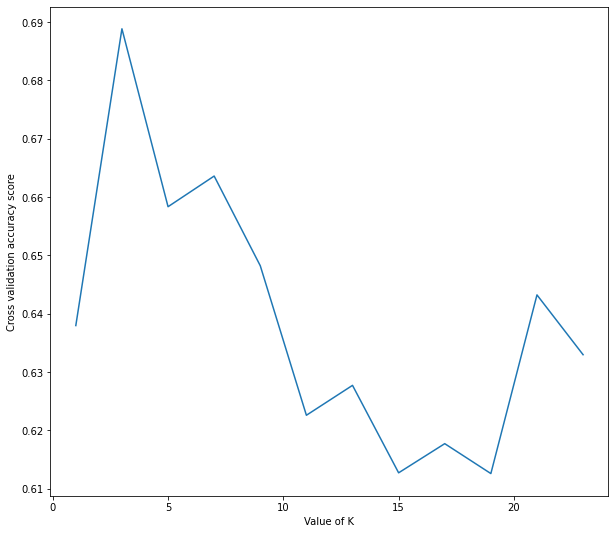

In [28]:
for i in k_value:
  model_1 = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski') 
  # score = accuracy 
  scores = cross_val_score(model_1,sc.transform(x),y,cv=5,scoring='accuracy')
  k_score.append(scores.mean())

plt.figure(figsize=(10,9))
plt.plot(k_value,k_score)
plt.xlabel('Value of K')
plt.ylabel('Cross validation accuracy score')
plt.show()

Finding the best value of K by plotting the error .

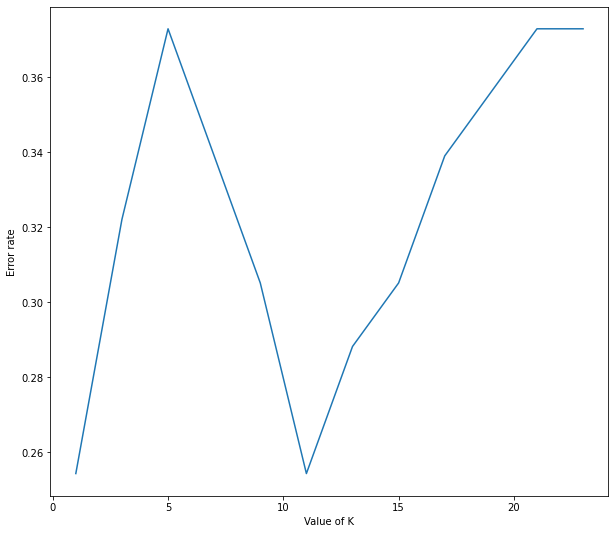

In [29]:
error_values=[]

for i in k_value:
  model_1 = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski') 
  model_1.fit(X_train,y_train)
  y_pred =model_1.predict(X_test)
  error_values.append(np.mean(y_pred != y_test)) 

plt.figure(figsize=(10,9))
plt.plot(k_value,error_values)
plt.xlabel('Value of K')
plt.ylabel('Error rate')
plt.show()

From the graph , K value gives better results for 3 and 4.